## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [284]:
from statistics import LinearRegression

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import colorbar
from pandas.core.common import random_state
from setuptools.command.rotate import rotate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV 

# some lib

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [285]:
data = pd.read_csv('data/train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [286]:
data.shape

(1460, 81)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [288]:
pd.concat([data.head(5), data.tail(5)])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [289]:
nulls = data.isna().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [290]:
'''
1) столбец Id
1) Уберем Alley, PoolQC, MiscFeature, тк слишком много пропусков 
2) Слишком много информации о подвале, можно оставить только TotalBsmtSF, BsmtQual, BsmtCond, т.е. удаляем:
BsmtExposure, BsmtFinType1, BsmtFinSF1,BsmtFinType2, BsmtFinSF2, BsmtUnfSF
'''

data = data.drop(['Id', 'Alley', 'PoolQC', 'MiscFeature', 'BsmtExposure', 
                  'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [291]:
data.shape

(1460, 71)

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [292]:
nulls = data.isna().sum()
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
Fence           1179
dtype: int64

In [293]:
print('Проценты пропусков: ')
for col in data:
    nullCnt = data[col].isna().sum()
    if nullCnt:
        print(f'\t{col}: {nullCnt / data.shape[0] * 100:.2f}%')

Проценты пропусков: 
	LotFrontage: 17.74%
	MasVnrType: 59.73%
	MasVnrArea: 0.55%
	BsmtQual: 2.53%
	BsmtCond: 2.53%
	Electrical: 0.07%
	FireplaceQu: 47.26%
	GarageType: 5.55%
	GarageYrBlt: 5.55%
	GarageFinish: 5.55%
	GarageQual: 5.55%
	GarageCond: 5.55%
	Fence: 80.75%


✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [294]:
object_names = data.select_dtypes('object').columns
object_names

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [295]:
for col in object_names:
    data[col] = data[col].fillna(data[col].describe()['top'])

In [296]:
float_names = data.select_dtypes('float64').columns
float_names

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [297]:
for col in float_names:
    data[col] = data[col].fillna(data[col].mean())

✅ Проверьте, что вы действительно избавились от пропусков

In [298]:
data.isna().any().any()

np.False_

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

In [299]:
ohe_names = []
label_names = []

for name in object_names:
    if data[name].nunique() == 2:
        label_names.append(name)
    else:
        ohe_names.append(name)
        
print('ohe:', ohe_names)
print('labels:', label_names)

ohe: ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']
labels: ['Street', 'Utilities', 'CentralAir']


In [300]:
data_coded = data.copy()

In [301]:
for col in label_names:
    data_coded[col] = LabelEncoder().fit_transform(data_coded[col])

In [302]:
data_coded = pd.get_dummies(data_coded, columns=ohe_names, drop_first=True, dtype=int)

In [303]:
data_coded.head(5)

,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

In [304]:
data_corr = data.drop(labels=object_names, axis=1).corr()
print(data_corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.022895     0.179283  0.103960     0.410238    -0.127788   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.036849  0.004779    -0.030429   

<Axes: >

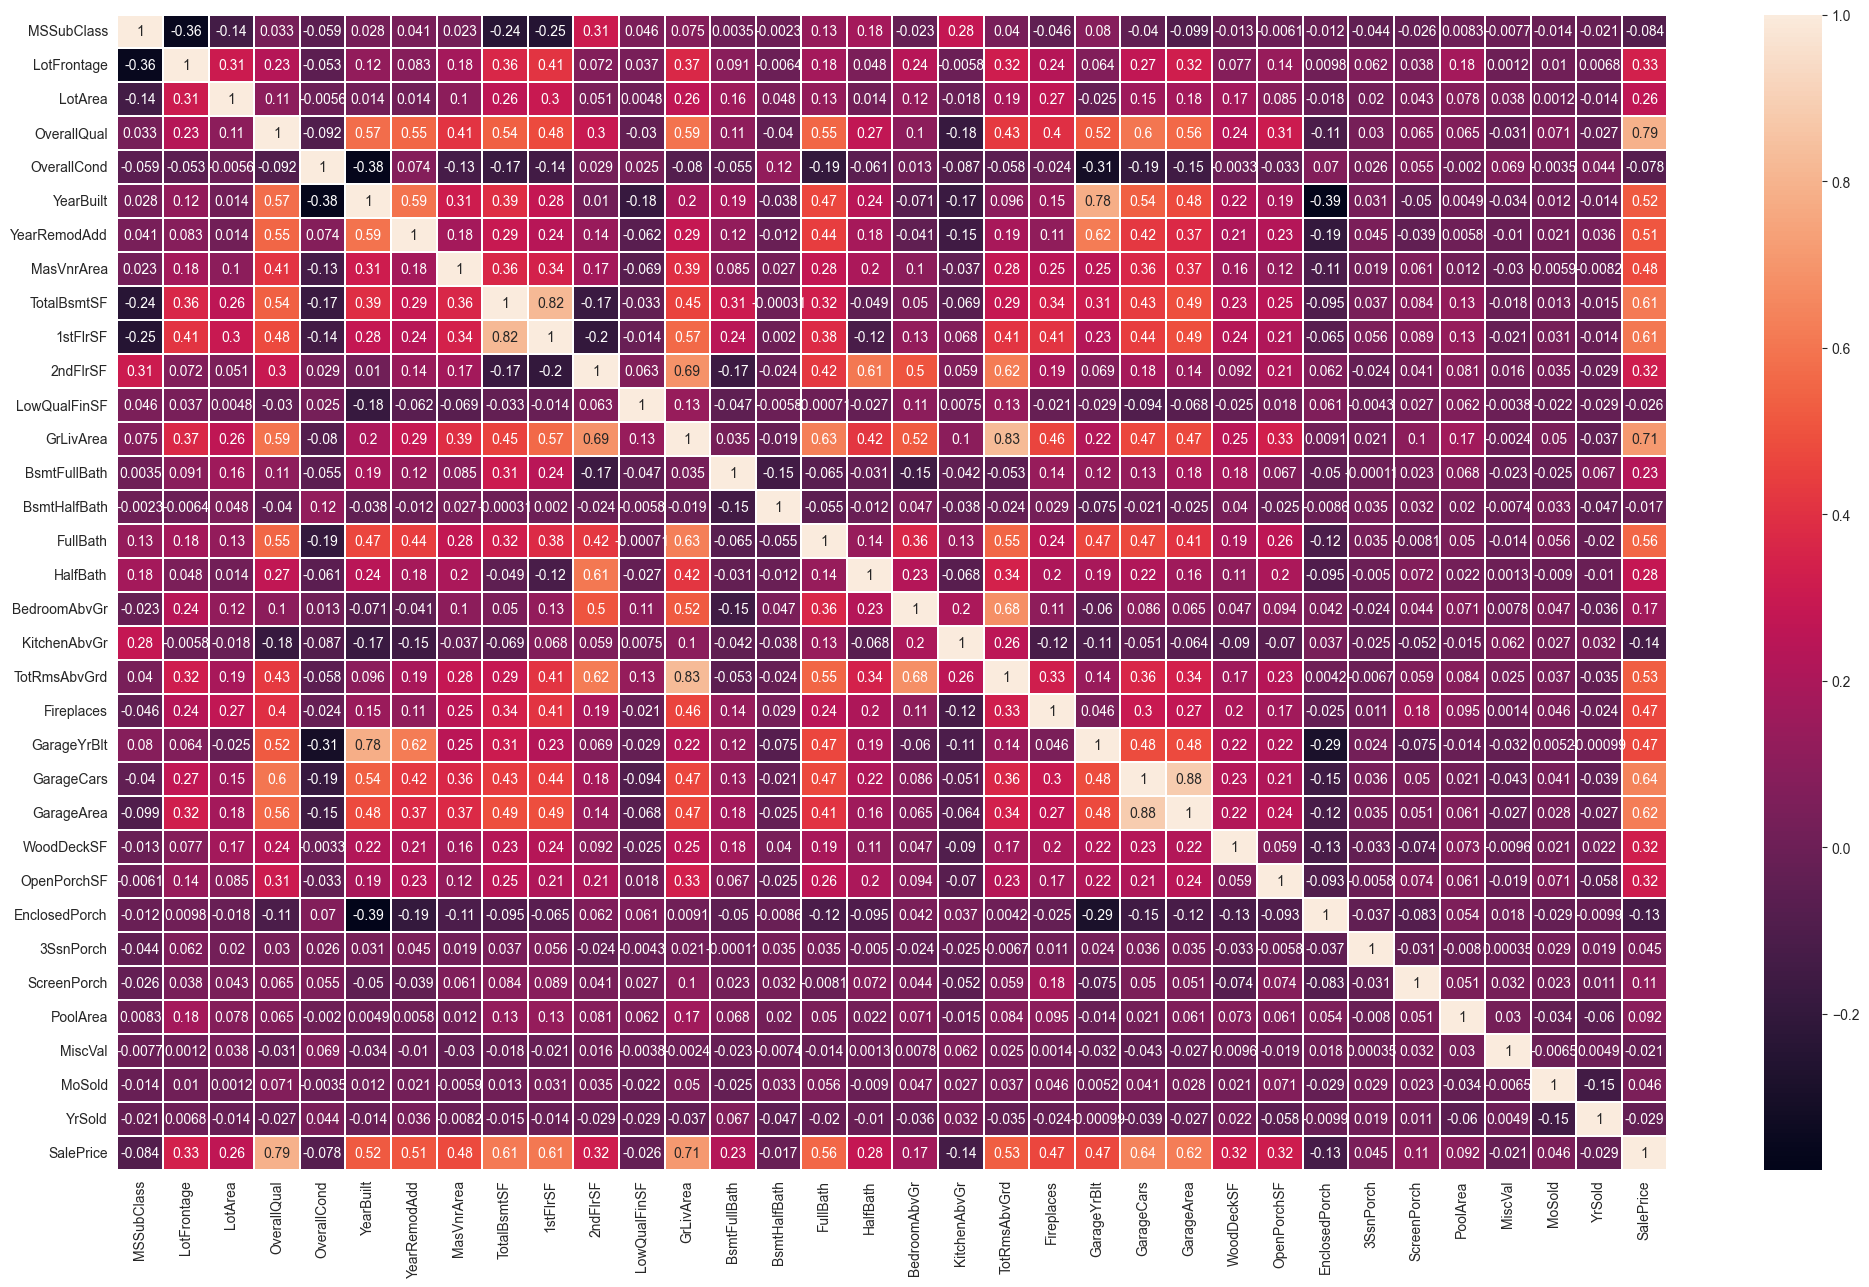

In [305]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(data_corr, linewidths=0.01, annot=True)

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

In [306]:
sol = data_corr.abs().where(np.triu(np.ones(data_corr.shape), k=1).astype('bool')).stack().sort_values(ascending=False)

features = []
corr = []

for index, value in sol.items():
    if index[1] == 'SalePrice':
        print(f'{index[0]}: {value:.4f}')
        features.append(index[0])
        corr.append(value)

OverallQual: 0.7910
GrLivArea: 0.7086
GarageCars: 0.6404
GarageArea: 0.6234
TotalBsmtSF: 0.6136
1stFlrSF: 0.6059
FullBath: 0.5607
TotRmsAbvGrd: 0.5337
YearBuilt: 0.5229
YearRemodAdd: 0.5071
MasVnrArea: 0.4752
GarageYrBlt: 0.4702
Fireplaces: 0.4669
LotFrontage: 0.3349
WoodDeckSF: 0.3244
2ndFlrSF: 0.3193
OpenPorchSF: 0.3159
HalfBath: 0.2841
LotArea: 0.2638
BsmtFullBath: 0.2271
BedroomAbvGr: 0.1682
KitchenAbvGr: 0.1359
EnclosedPorch: 0.1286
ScreenPorch: 0.1114
PoolArea: 0.0924
MSSubClass: 0.0843
OverallCond: 0.0779
MoSold: 0.0464
3SsnPorch: 0.0446
YrSold: 0.0289
LowQualFinSF: 0.0256
MiscVal: 0.0212
BsmtHalfBath: 0.0168


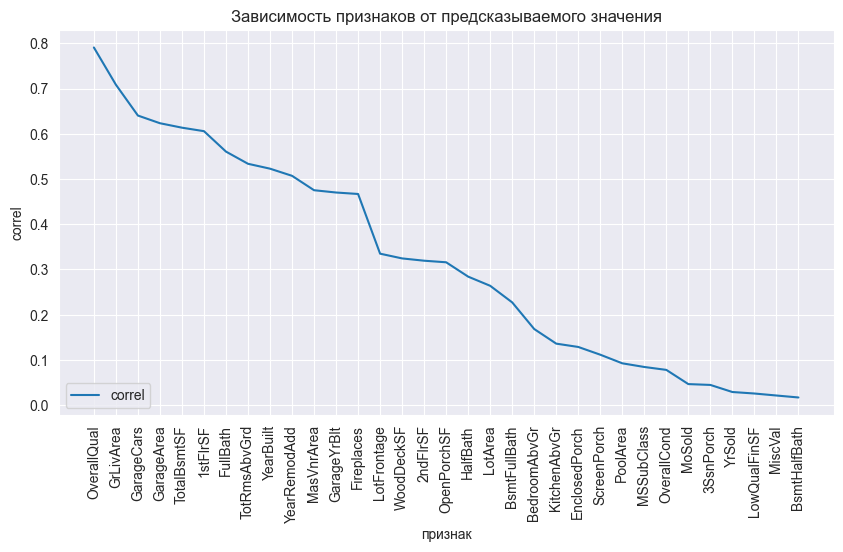

In [307]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(features, corr, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('correl')
plt.title('Зависимость признаков от предсказываемого значения')

ax.legend(loc='lower left')

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

Text(0, 0.5, 'count')

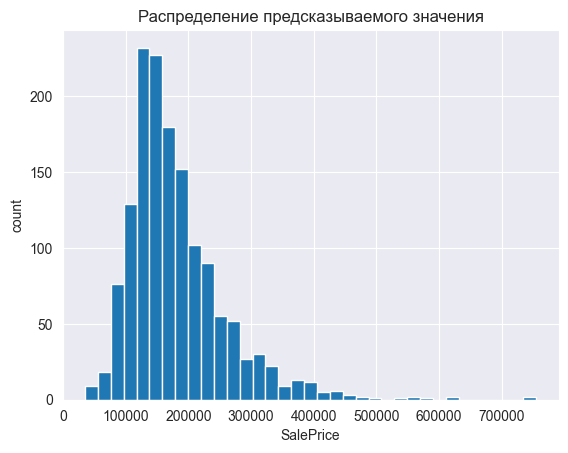

In [308]:
plt.hist(data['SalePrice'], bins=35)

plt.title('Распределение предсказываемого значения')
plt.xlabel('SalePrice')
plt.ylabel('count')

Text(0, 0.5, 'count')

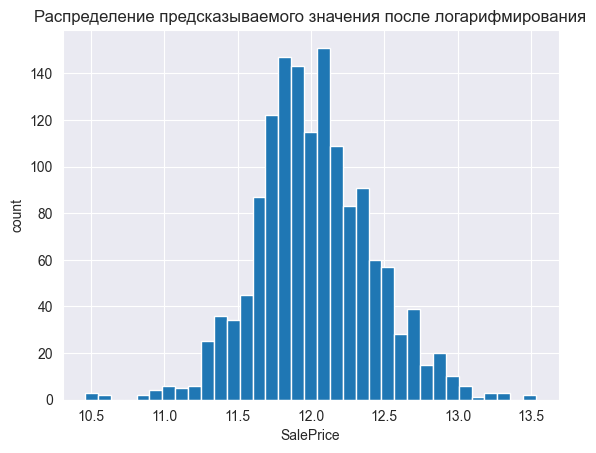

In [309]:
plt.hist(np.log1p(data['SalePrice']), bins=35)

plt.title('Распределение предсказываемого значения после логарифмирования')
plt.xlabel('SalePrice')
plt.ylabel('count')

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [310]:
np.random.seed(13)

In [311]:
X = data_coded.drop('SalePrice', axis=1)
y = data['SalePrice']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, np.log1p(y), test_size=0.25)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

### LinearRegression

In [313]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [314]:
y_train_pred = lin_regr.predict(X_train)
y_test_pred = lin_regr.predict(X_test)

In [315]:
print(f'lin_regr RMSE train: {np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred)))}')
print(f'lin_regr RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))}')

lin_regr RMSE train: 15870.283924005762
lin_regr RMSE test: 124823.21676229055


In [316]:
print(f'lin_regr MAE train: {mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'lin_regr MAE test: {mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))}')

lin_regr MAE train: 11026.565645498064
lin_regr MAE test: 24771.665501453044


In [317]:
print(f'lin_regr r2_score train: {r2_score(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'lin_regr r2_score test: {r2_score(np.expm1(y_test), np.expm1(y_test_pred))}')

lin_regr r2_score train: 0.9593548287574856
lin_regr r2_score test: -1.3531827405921968


In [318]:
coef_lin_regr = pd.DataFrame(lin_regr.coef_, index=X.columns, columns=['coef_lin_regr']).sort_values(by='coef_lin_regr')
coef_lin_regr

,coef_lin_regr
Exterior1st_BrkComm,-0.425206
SaleCondition_Partial,-0.300955
Utilities,-0.231403
Electrical_Mix,-0.213621
Functional_Maj2,-0.197558
...,...
MSZoning_RM,0.301698
MSZoning_RL,0.337181
MSZoning_FV,0.348714
BsmtCond_Po,0.369657


### Lasso

In [319]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

,alpha,0.001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [320]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [321]:
print(f'lasso RMSE train: {np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred)))}')
print(f'lasso RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))}')

lasso RMSE train: 19027.62840515602
lasso RMSE test: 150468.4839965458


In [322]:
print(f'lasso MAE train: {mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'lasso MAE test: {mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))}')

lasso MAE train: 13142.649736068708
lasso MAE test: 25762.08580591855


In [323]:
print(f'lasso r2_score train: {r2_score(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'lasso r2_score test: {r2_score(np.expm1(y_test), np.expm1(y_test_pred))}')

lasso r2_score train: 0.9415736323142263
lasso r2_score test: -2.419448004902342


In [324]:
coef_lasso = pd.DataFrame(lasso.coef_, index=X.columns, columns=['coef_lasso']).sort_values(by='coef_lasso')
coef_lasso

,coef_lasso
BsmtQual_Gd,-0.021426
HouseStyle_1Story,-0.020448
BldgType_Twnhs,-0.020411
Neighborhood_NWAmes,-0.017435
Neighborhood_Edwards,-0.014777
...,...
MSZoning_RL,0.059197
BsmtFullBath,0.059997
SaleCondition_Normal,0.066242
Neighborhood_Crawfor,0.106379


### Ridge

In [325]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [326]:
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

In [327]:
print(f'ridge RMSE train: {np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(y_train_pred)))}')
print(f'ridge RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))}')

ridge RMSE train: 15886.00832953596
ridge RMSE test: 124944.19682085369


In [328]:
print(f'ridge MAE train: {mean_absolute_error(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'ridge MAE test: {mean_absolute_error(np.expm1(y_test), np.expm1(y_test_pred))}')

ridge MAE train: 11089.475130553463
ridge MAE test: 24649.434695583535


In [329]:
print(f'ridge r2_score train: {r2_score(np.expm1(y_train), np.expm1(y_train_pred))}')
print(f'ridge r2_score test: {r2_score(np.expm1(y_test), np.expm1(y_test_pred))}')

ridge r2_score train: 0.9592742457280041
ridge r2_score test: -1.357746413194815


In [330]:
coef_ridge = pd.DataFrame(ridge.coef_, index=X.columns, columns=['coef_ridge']).sort_values(by='coef_ridge')
coef_ridge

,coef_ridge
Exterior1st_BrkComm,-0.361938
SaleCondition_Partial,-0.232623
Utilities,-0.200545
Functional_Maj2,-0.193293
LandSlope_Sev,-0.185014
...,...
MSZoning_RM,0.261470
MSZoning_RL,0.295039
BsmtCond_Po,0.298513
MSZoning_FV,0.303370


In [331]:
alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6]

lasso_euclid = []
ridge_euclid = []

for i in range(len(alphas)):
    lasso = Lasso(alpha = alphas[i])
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
    
for i in range(len(alphas)):
    ridge = Ridge(alpha = alphas[i])
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
    
print(lasso_euclid, '\n' + '-' * 15 + '\n', ridge_euclid)

[np.float64(0.9840767092257414), np.float64(0.7401668433615176), np.float64(0.39996523899713166), np.float64(0.30901663383793215), np.float64(0.23809352188849783), np.float64(0.07688030519855377), np.float64(0.0032020811937681633), np.float64(0.002293326410817482), np.float64(0.0011145025478250918), np.float64(0.0006229503428644619)] 
---------------
 [np.float64(1.487326943097707), np.float64(1.487152099448918), np.float64(1.4864537902036028), np.float64(1.4857571789625865), np.float64(1.4840230227980684), np.float64(1.4544725552703452), np.float64(0.9126861824821687), np.float64(0.744252368649454), np.float64(0.5929711911219574), np.float64(0.4049822706156961)]


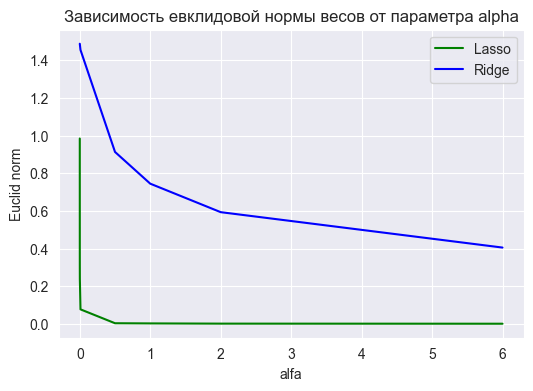

In [332]:
x = alphas
y1 = lasso_euclid
y2 = ridge_euclid

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(x, y1, color='green', label='Lasso')
ax.plot(x, y2, color='blue', label='Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclid norm')
plt.title('Зависимость евклидовой нормы весов от параметра alpha')

leg = ax.legend(loc='upper right', frameon=True)

In [333]:
reg = LassoCV(cv=5, alphas=[0.0005, 0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6], random_state=0).fit(X_train, y_train)
best_lasso = reg.alpha_
print("Лучший параметр альфа для Lasso: ", best_lasso)

Лучший параметр альфа для Lasso:  0.0005


/Users/igorkravchenko/dev/envs/pyVenvUniversal/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.680e+00, tolerance: 1.403e-02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/igorkravchenko/dev/envs/pyVenvUniversal/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.481e+00, tolerance: 1.403e-02
  model = cd_fast.enet_coordinate_descent_gram(
/Users/igorkravchenko/dev/envs/pyVenvUniversal/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterat

In [334]:
lasso_cv = Lasso(alpha=best_lasso)
lasso_cv.fit(X_train, y_train)

print(f'lasso_cv RMSE train: {np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(lasso_cv.predict(X_train))))}')
print(f'lasso_cv RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(lasso_cv.predict(X_test))))}')

lasso_cv RMSE train: 17974.35801196875
lasso_cv RMSE test: 143840.90521730317


In [335]:
coef_lasso_cv = pd.DataFrame(lasso_cv.coef_, index=X.columns, columns=['coef_lasso_cv']).sort_values(by='coef_lasso_cv')
coef_lasso_cv

,coef_lasso_cv
Neighborhood_MeadowV,-0.046553
BldgType_Twnhs,-0.034876
BsmtQual_Gd,-0.034748
HouseStyle_1Story,-0.029740
Neighborhood_Mitchel,-0.027179
...,...
SaleCondition_Normal,0.077909
Neighborhood_StoneBr,0.086244
Street,0.093041
SaleType_New,0.113170


In [336]:
reg = RidgeCV(cv=5, alphas=[0.0005, 0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.5, 1, 2, 6, 8, 10, 12, 15, 20, 25, 30])
reg.fit(X_train, y_train)
best_ridge = reg.alpha_
print("Лучший параметр альфа для Ridge: ", best_ridge)

Лучший параметр альфа для Ridge:  10.0


In [337]:
ridge_cv = Ridge(alpha=best_ridge)
ridge_cv.fit(X_train, y_train)

print(f'ridge_cv RMSE train: {np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(ridge_cv.predict(X_train))))}')
print(f'ridge_cv RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(ridge_cv.predict(X_test))))}')

ridge_cv RMSE train: 17400.32417789371
ridge_cv RMSE test: 136846.7386363204


In [338]:
coef_ridge_cv = pd.DataFrame(ridge_cv.coef_, index=X.columns, columns=['coef_ridge_cv']).sort_values(by='coef_ridge_cv')
coef_ridge_cv

,coef_ridge_cv
Neighborhood_MeadowV,-0.057013
LandSlope_Sev,-0.047002
Functional_Maj2,-0.042589
Neighborhood_Edwards,-0.040591
KitchenQual_Fa,-0.040302
...,...
BsmtFullBath,0.064935
Functional_Typ,0.068098
SaleCondition_Normal,0.073593
Neighborhood_StoneBr,0.074066


✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

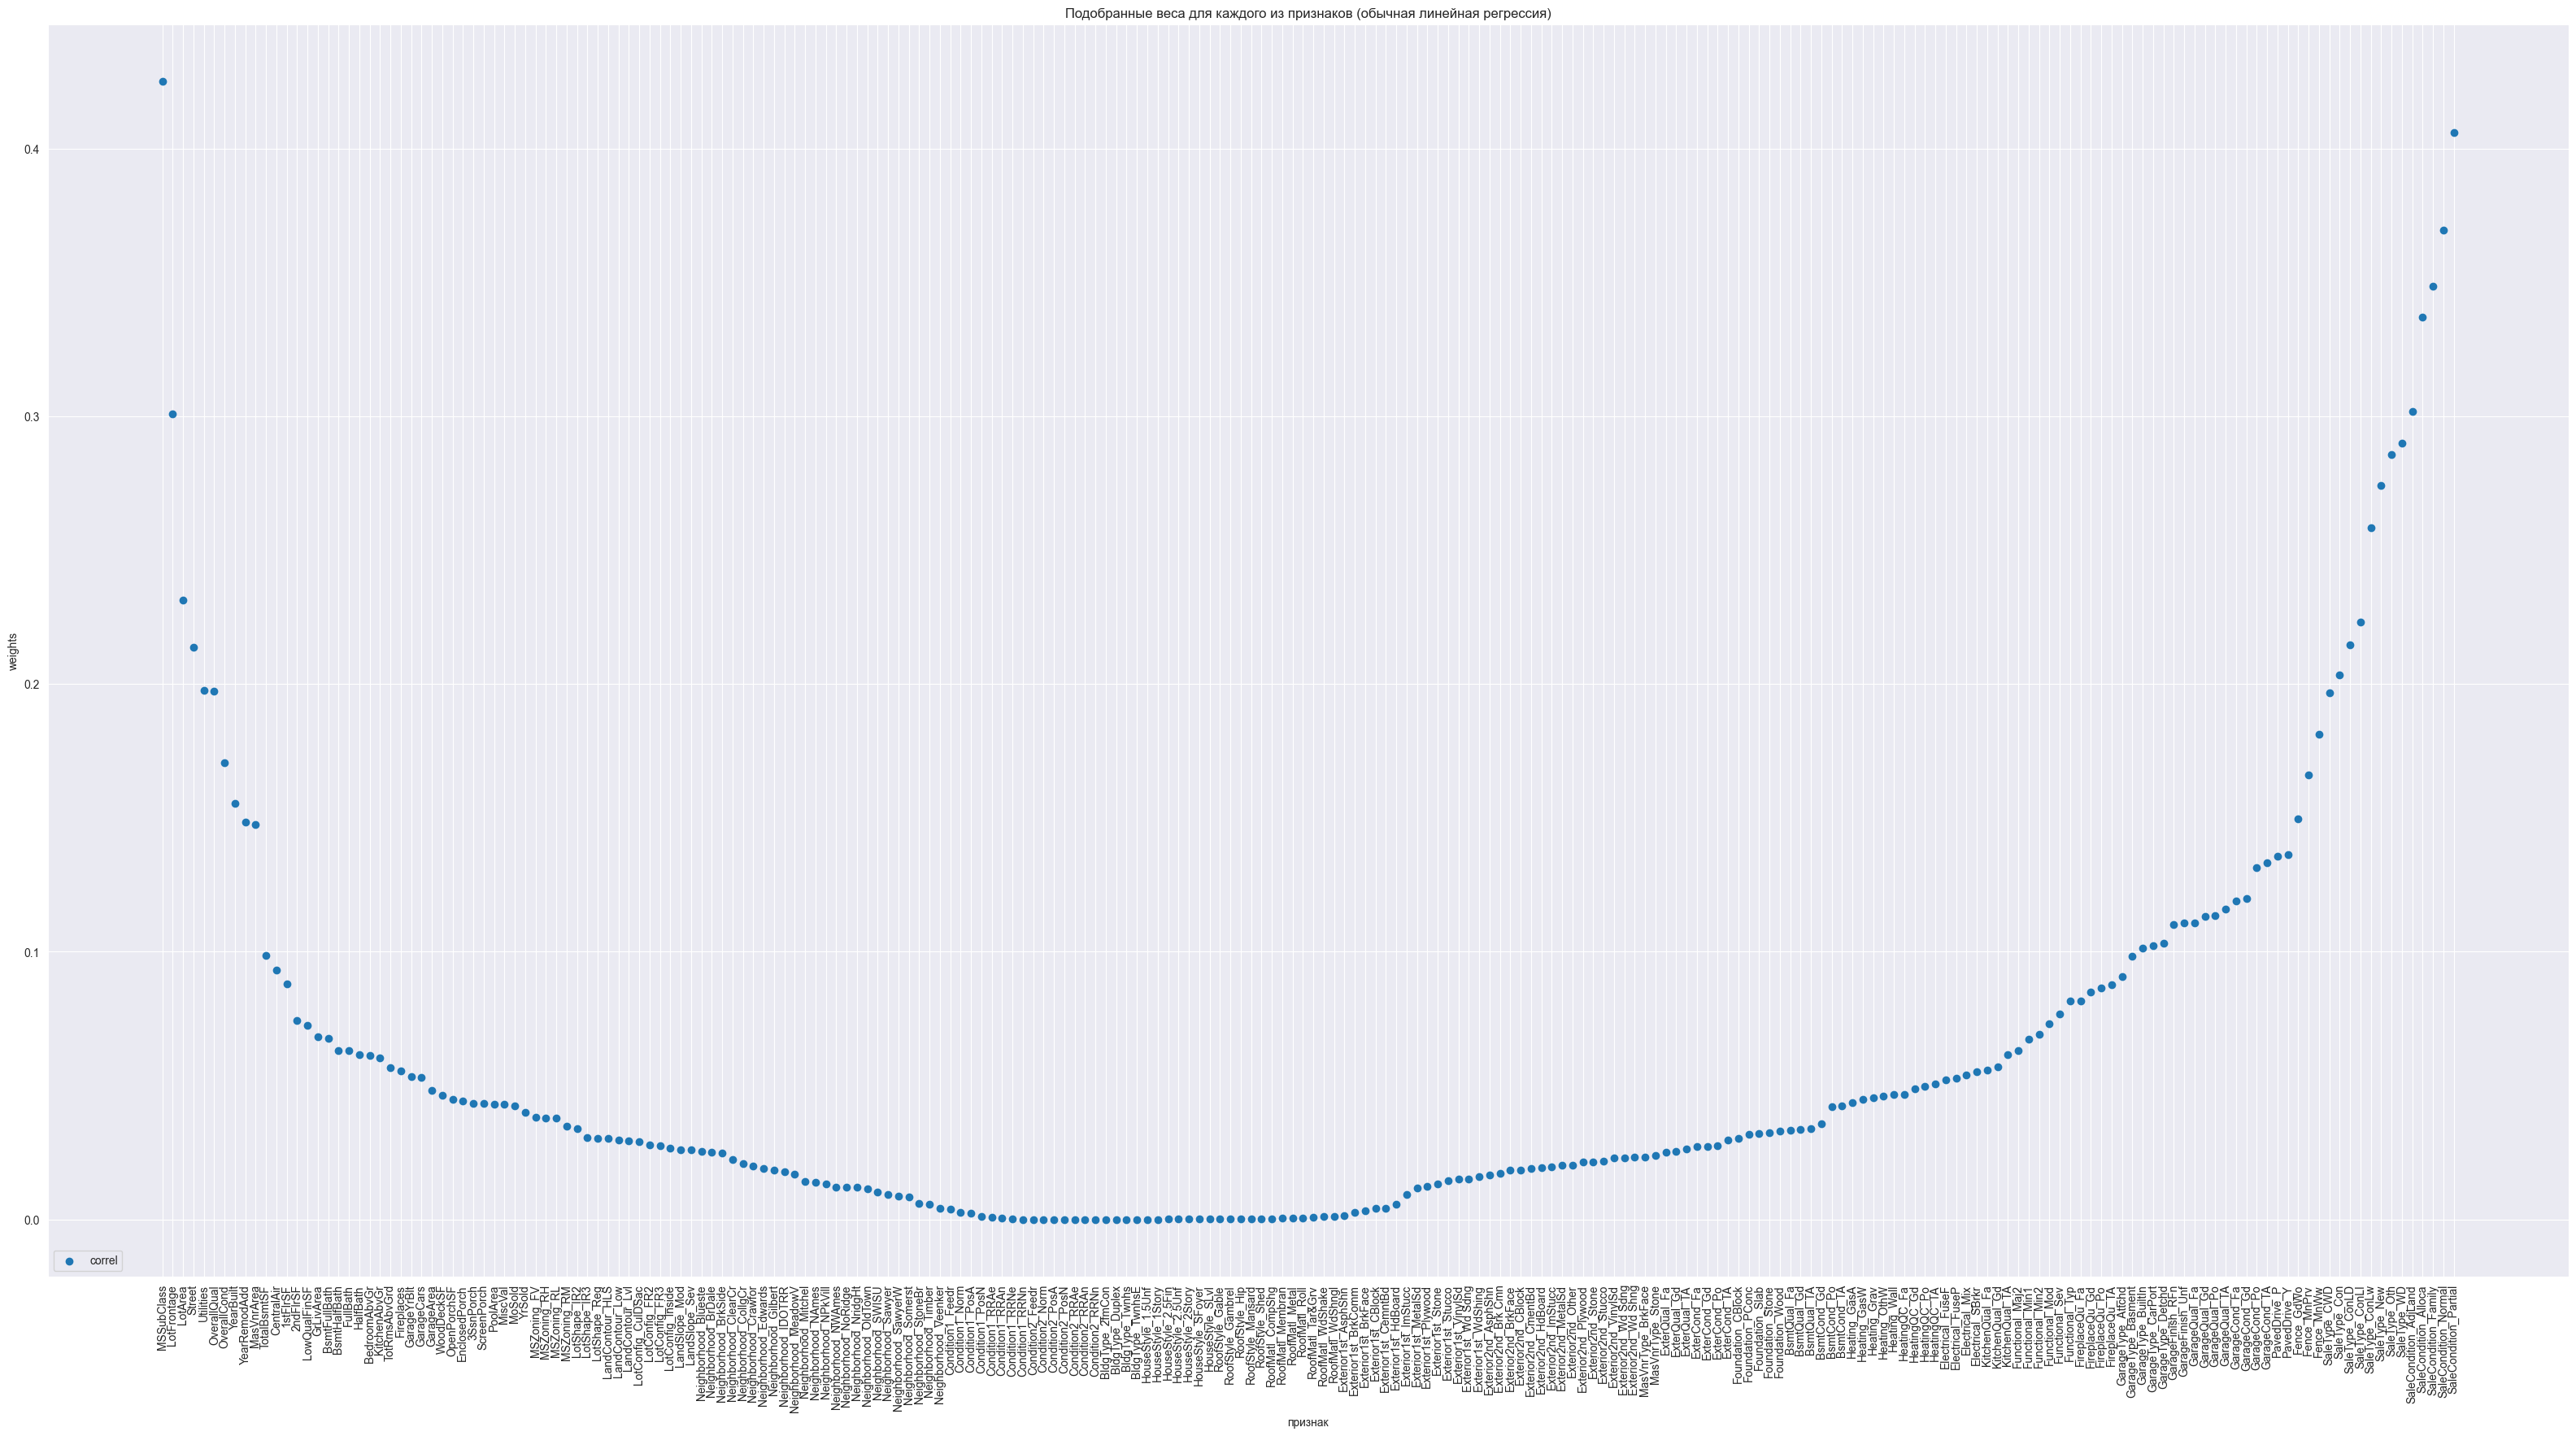

In [339]:
y1 = coef_lin_regr['coef_lin_regr'].abs()
fig, ax = plt.subplots(figsize=(40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (обычная линейная регрессия)')

leg = ax.legend(loc='lower left', frameon=True)

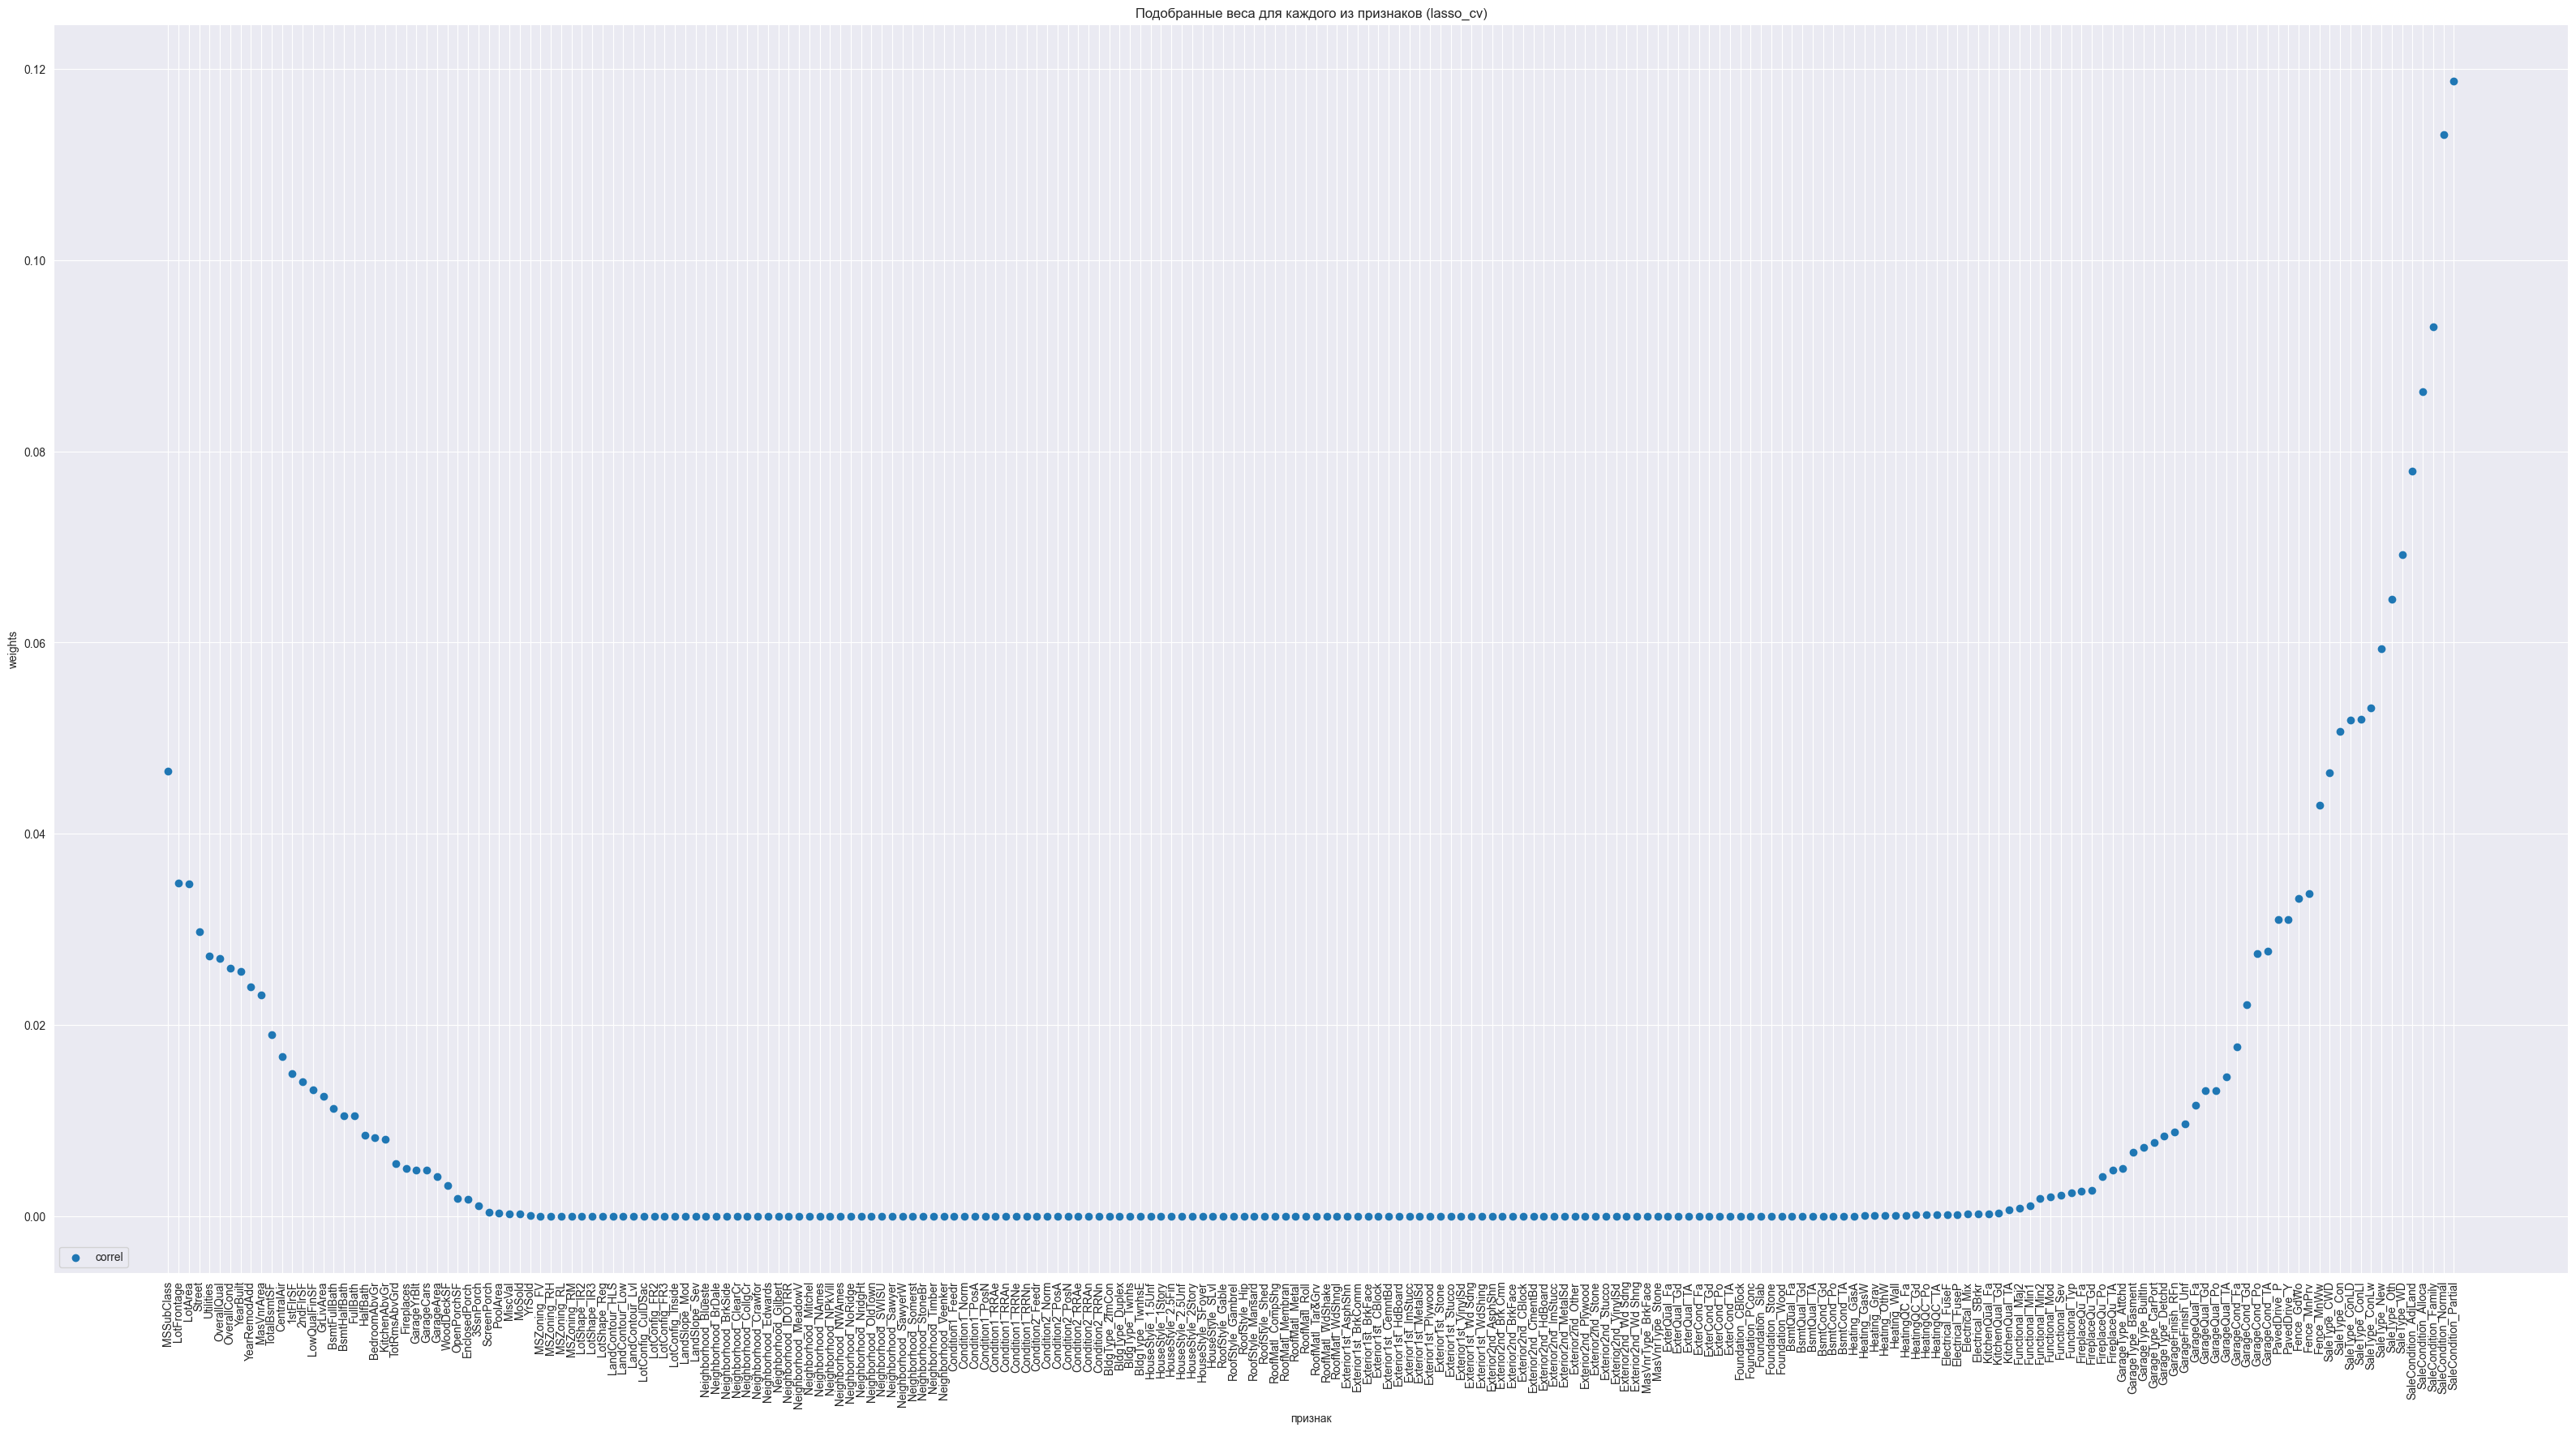

In [340]:
y1 = coef_lasso_cv['coef_lasso_cv'].abs()
fig, ax = plt.subplots(figsize=(40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (lasso_cv)')

leg = ax.legend(loc='lower left', frameon=True)

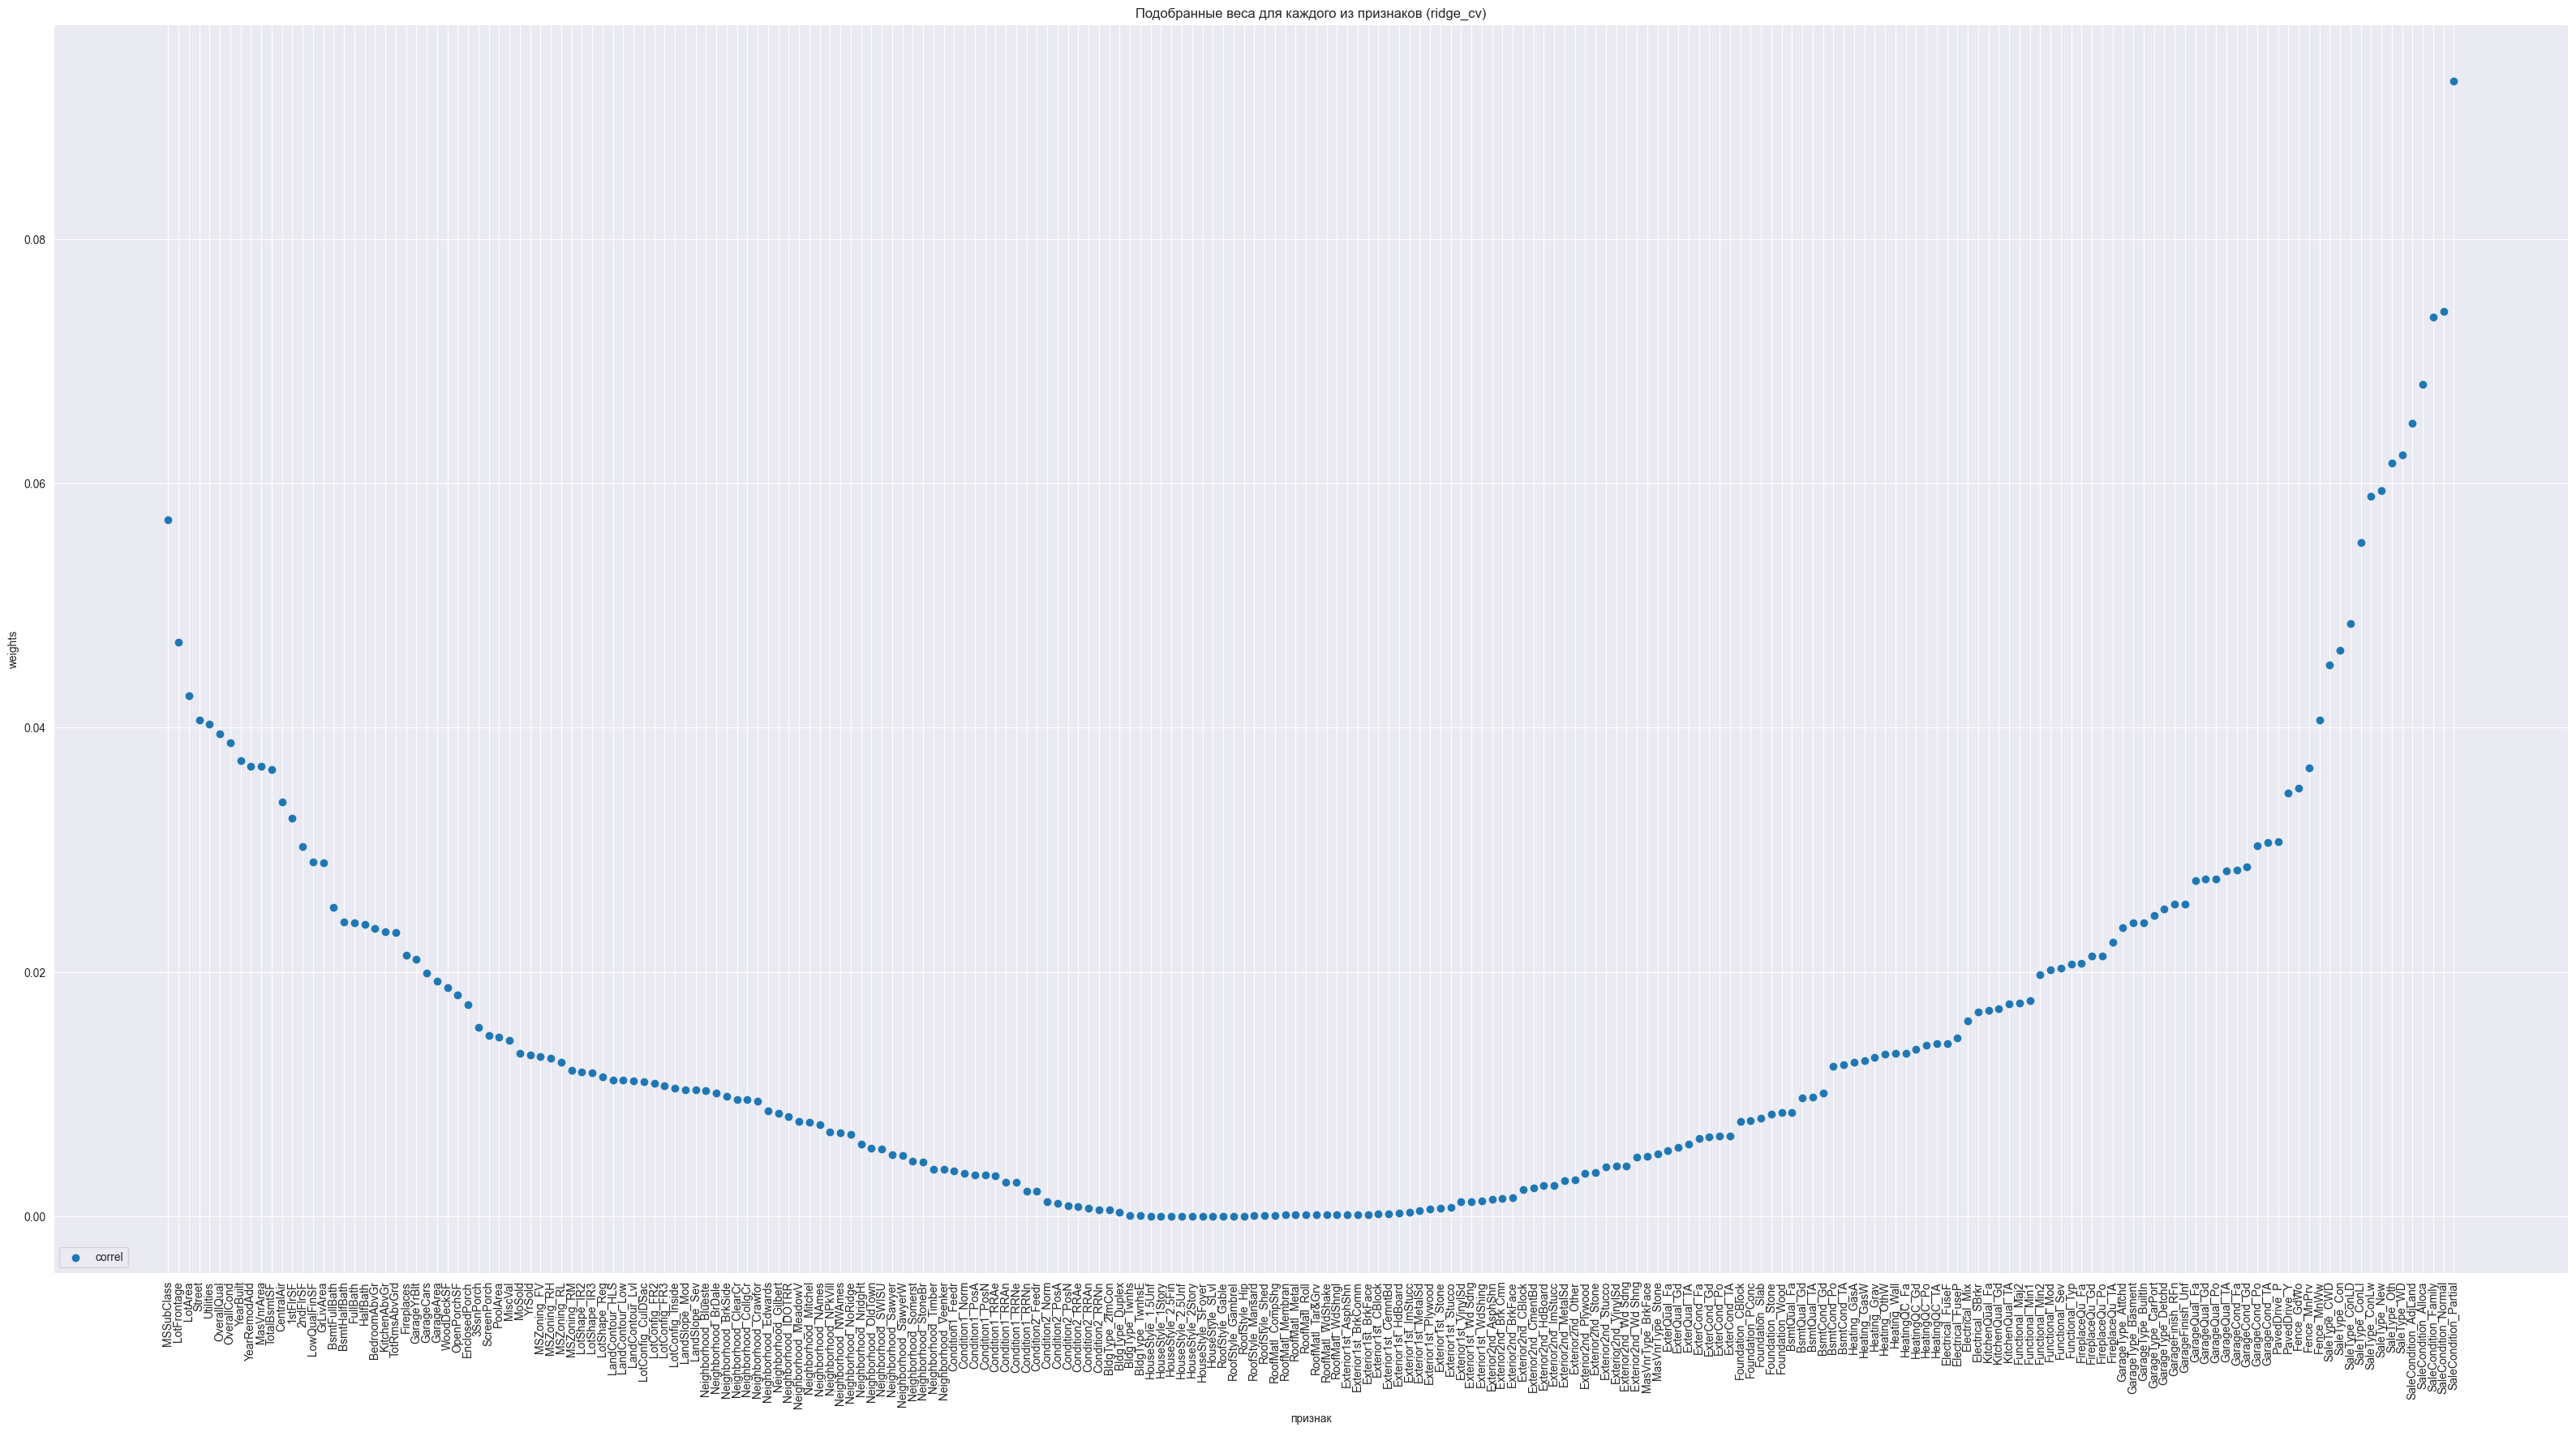

In [341]:
y1 = coef_ridge_cv['coef_ridge_cv'].abs()
fig, ax = plt.subplots(figsize=(40,20))

x = X.columns

ax.scatter(x, y1, label='correl')
plt.xticks(rotation=90)

ax.grid(True)
plt.xlabel('признак')
plt.ylabel('weights')
plt.title('Подобранные веса для каждого из признаков (ridge_cv)')

leg = ax.legend(loc='lower left', frameon=True)

In [342]:
print(f'lin_regr RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(lin_regr.predict(X_test))))}')
print(f'lasso_cv RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(lasso_cv.predict(X_test))))}')
print(f'ridge_cv RMSE test: {np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(ridge_cv.predict(X_test))))}')

lin_regr RMSE test: 124823.21676229055
lasso_cv RMSE test: 143840.90521730317
ridge_cv RMSE test: 136846.7386363204
